# Opioid Misuse Prediction Models

*Yiyu Wang 2024/04/19*

In [1]:
data_dir = '../data/'
figures_dir = '../figures/'
model_dir = '../model_results/'


In [2]:
raw_PREDICTOR_COLUMNS=['k23_age', 'demo_hispanic', 'demo_ethnicity_1', 'demo_ethnicity_2', 'demo_ethnicity_3',
       'demo_ethnicity_4', 'demo_ethnicity_5', 'demo_ethnicity_6',
       'demo_ethnicity_99', 'demo_gender_1', 'demo_gender_2', 'demo_gender_99',
       'demo_income', 'demo_education', 'demo_legal', 'demo_employment___1',
       'demo_employment___2', 'demo_employment___3', 'demo_employment___4',
       'demo_employment___5', 'demo_employment___6', 'demo_employment___7',
       'demo_employment___8', 'demo_employment___9', 'demo_employment___99',
       'demo_disability', 'demo_marital', 'mh_accident', 'mh_pain_duration',
       'promis_pi_01', 'promis_pi_02', 'promis_pi_03', 'opioid_years_v2',
       'meds_more_v2', 'PainInT', 'AngerT', 'AnxietyT', 'DepressT', 'FatigueT',
       'GlobalpT', 'GlobalmT', 'PhyFxT', 'SleepDisT', 'audittot', 'AUDITpos',
       'pcstotal', 'pcs_help', 'pcs_rum', 'pcs_mag', 'dasttot', 'c_eactotl',
       'aeqtot', 'ctq_emo_abu', 'ctq_phy_abu', 'ctq_emo_neg', 'ctq_phy_neg',
       'ctq_sex_abu', 'ctqtot', 'mh_psychological_yes_binary']

rename_dict = {'k23_age': 'age', 
              'demo_hispanic': 'Hispanic', 
              'demo_ethnicity_1':'Asian',
              'demo_ethnicity_2':'Caucasian', 
              'demo_ethnicity_3':'NativeHawaiian', 
              'demo_ethnicity_4':'Black', 
              'demo_ethnicity_5':'AmericanIndian', 
              'demo_ethnicity_6':'MoreThanOneRace', 
              'demo_ethnicity_99':'OtherEthnicity',
              'demo_income':'income', 'demo_education':'education',
              'demo_legal':'legal', 
              'demo_gender_1': 'male', 'demo_gender_2': 'female', 'demo_gender_99':'OtherGender',
              'demo_employment___1':'part_time', 'demo_employment___2':'full_time',
              'demo_employment___3':'not_employed', 'demo_employment___4':'homemaker',
              'demo_employment___5':'temp_unemployed',
              'demo_employment___6':'unemployed', 'demo_employment___7':'looking_unemployed',
              'demo_employment___8':'disabled', 'demo_employment___9':'retired',
              'demo_employment___99':'OtherEmployment', 'demo_disability':'disability',
              'demo_marital':'marital', 'opioid_years_v2': 'opioid_years', 'meds_more_v2':'meds_more',
              'mh_accident':'accident', 'mh_pain_duration':'pain_duration', 'mh_psychological_yes_binary':'psychological_treatment_yes',
              'promis_pi_01':'past_pain_intensity', 'promis_pi_02':'worst_pain_intensity', 'promis_pi_03':'current_pain_intensity',
              'PainInT':'PainInterference', 'AngerT':'Anger', 'AnxietyT':'Anxiety', 'DepressT':'Depression', 'FatigueT':'Fatigue',
              'GlobalpT':'GlobalPhysical', 'GlobalmT':'GlobalMental', 'PhyFxT':'PhysicalFunction', 'SleepDisT':'SleepDisturbance',
              'audittot':'AlcoholUseScore', 'AUDITpos':'AlcoholUserBinary', 
              'pcstotal':'PCS_total', 'pcs_help':'PCS_helplessness', 'pcs_rum':'PCS_rumination', 'pcs_mag':'PCS_magnification',
              'dasttot':'DrugUseScore', 'c_eactotl':'CocaineUseScore', 'aeqtot':'AmbivalenceEmotion',
              'ctqtot': 'ChildhoodTrauma_total', 'ctq_emo_abu':'CTQ_EmotionalAbuse', 'ctq_phy_abu':'CTQ_PhysicalAbuse', 'ctq_emo_neg':'CTQ_EmotionalNeglect', 'ctq_phy_neg':'CTQ_PhysicalNeglect','ctq_sex_abu':'CTQ_SexualAbuse'}

PREDICTOR_COLUMNS = [rename_dict[col] for col in raw_PREDICTOR_COLUMNS]
print(PREDICTOR_COLUMNS)
print('n predictors =', len(PREDICTOR_COLUMNS))
test_size = 0.2
SEED = 100

['age', 'Hispanic', 'Asian', 'Caucasian', 'NativeHawaiian', 'Black', 'AmericanIndian', 'MoreThanOneRace', 'OtherEthnicity', 'male', 'female', 'OtherGender', 'income', 'education', 'legal', 'part_time', 'full_time', 'not_employed', 'homemaker', 'temp_unemployed', 'unemployed', 'looking_unemployed', 'disabled', 'retired', 'OtherEmployment', 'disability', 'marital', 'accident', 'pain_duration', 'past_pain_intensity', 'worst_pain_intensity', 'current_pain_intensity', 'opioid_years', 'meds_more', 'PainInterference', 'Anger', 'Anxiety', 'Depression', 'Fatigue', 'GlobalPhysical', 'GlobalMental', 'PhysicalFunction', 'SleepDisturbance', 'AlcoholUseScore', 'AlcoholUserBinary', 'PCS_total', 'PCS_helplessness', 'PCS_rumination', 'PCS_magnification', 'DrugUseScore', 'CocaineUseScore', 'AmbivalenceEmotion', 'CTQ_EmotionalAbuse', 'CTQ_PhysicalAbuse', 'CTQ_EmotionalNeglect', 'CTQ_PhysicalNeglect', 'CTQ_SexualAbuse', 'ChildhoodTrauma_total', 'psychological_treatment_yes']
n predictors = 59


In [3]:
import numpy as np
import glob
from sklearn.metrics import roc_auc_score, mean_squared_error
import matplotlib.pyplot as plt
import joblib
import seaborn as sns


from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')


# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score



In [4]:

def split_data(df, split_data = 'split', outcome = 'ouddx', predictor_columns = PREDICTOR_COLUMNS, test_size = 0.2, SEED = SEED):
    if split_data == 'cohort':

        y_train, y_test, y_val = df.loc[df['cohort'] == 'train', outcome], df.loc[df['cohort'] == 'test', outcome], df.loc[df['cohort'] == 'val', outcome]
        X_train, X_test, X_val = df.loc[df['cohort'] == 'train', predictor_columns], df.loc[df['cohort'] == 'test', predictor_columns], df.loc[df['cohort'] == 'validation', predictor_columns]


        print(X_train.shape, X_test.shape, X_val.shape)
    elif split_data == 'split':
        X = df[predictor_columns]
        y = df[outcome]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED)
        
    else:
        X_train, X_test, y_train, y_test = [], [], [], []
        print('split_data must be either "split" or "cohort"')
    return X_train, X_test, y_train, y_test
    # return {'X_train': X_train,'X_test':X_test, 'y_train': y_train, 'y_test':y_test}




In [15]:


df = pd.read_csv(data_dir + 'M_K23_ML_reduced_imputed.csv')
df = df.rename(columns=rename_dict)
df.head()

,record_id,age,Hispanic,income,education,legal,part_time,full_time,not_employed,homemaker,...,Caucasian,NativeHawaiian,Black,AmericanIndian,MoreThanOneRace,OtherEthnicity,male,female,OtherGender,psychological_treatment_yes
0,A001,23,0,2,5,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,A002,70,0,8,10,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,A003,62,0,6,5,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,A004,53,1,2,6,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,A005,43,0,6,5,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


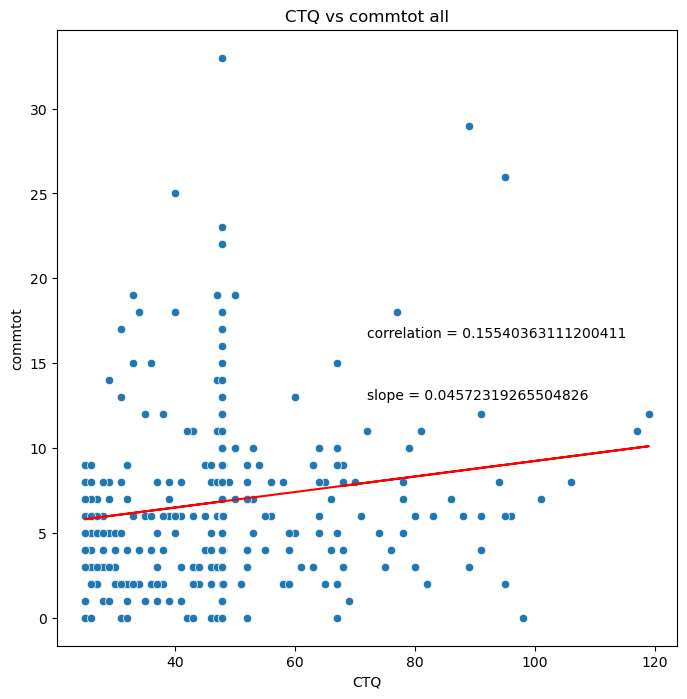

In [19]:
plot_df = df.copy()

plt.figure(figsize=(8,8))
sns.scatterplot(x='ChildhoodTrauma_total', y='commtot', data=plot_df)

# add a line of best fit
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(plot_df['ChildhoodTrauma_total'], plot_df['commtot'])
plt.plot(plot_df['ChildhoodTrauma_total'], slope*plot_df['ChildhoodTrauma_total'] + intercept, color='red')
plt.title('CTQ vs commtot all')
plt.xlabel('CTQ')
plt.ylabel('commtot')
# print the correlation, and slope of the line on the plot
plt.annotate('correlation = ' + str(r_value), xy=(0.5, 0.5), xycoords='axes fraction')
plt.annotate('slope = ' + str(slope), xy=(0.5, 0.4), xycoords='axes fraction')
plt.show()


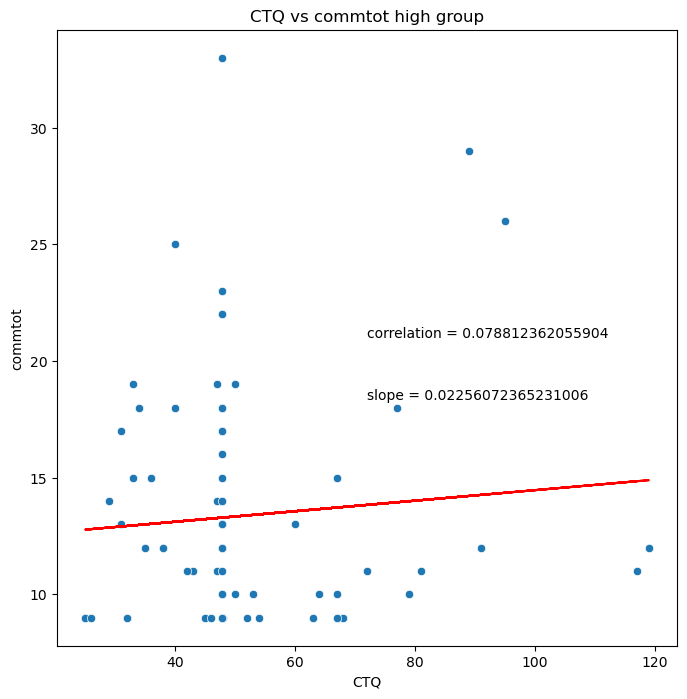

In [20]:
# look at CTQ and comm score relationship in high group
plot_df = df.loc[df['commtot'] >= 9].reset_index(drop=True)
# plot correlation between CTQ and commtot
plt.figure(figsize=(8,8))
sns.scatterplot(x='ChildhoodTrauma_total', y='commtot', data=plot_df)

# add a line of best fit
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(plot_df['ChildhoodTrauma_total'], plot_df['commtot'])
plt.plot(plot_df['ChildhoodTrauma_total'], slope*plot_df['ChildhoodTrauma_total'] + intercept, color='red')
plt.title('CTQ vs commtot high group')
plt.xlabel('CTQ')
plt.ylabel('commtot')
# print the correlation, and slope of the line on the plot
plt.annotate('correlation = ' + str(r_value), xy=(0.5, 0.5), xycoords='axes fraction')
plt.annotate('slope = ' + str(slope), xy=(0.5, 0.4), xycoords='axes fraction')
plt.show()


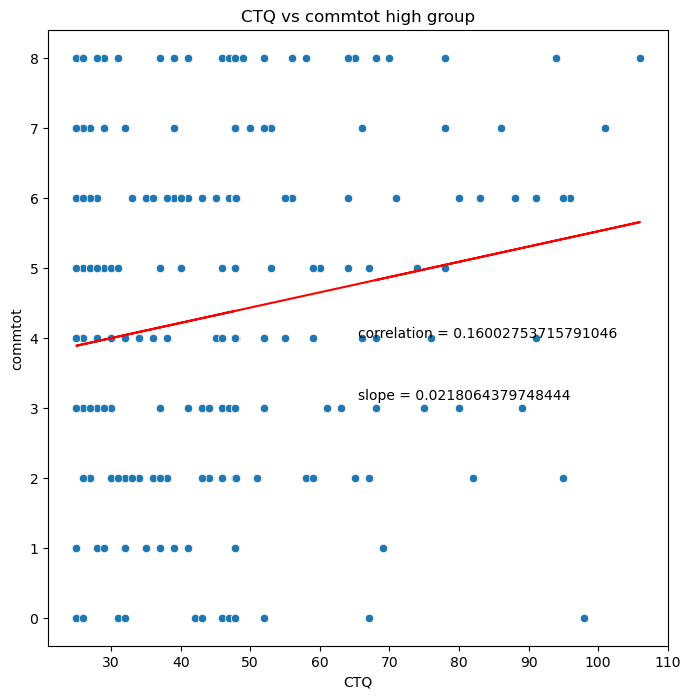

In [21]:
# look at CTQ and comm score relationship in high group

plot_df = df.loc[df['commtot'] < 9].reset_index(drop=True)

# plot correlation between CTQ and commtot
plt.figure(figsize=(8,8))
sns.scatterplot(x='ChildhoodTrauma_total', y='commtot', data=plot_df)

# add a line of best fit
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(plot_df['ChildhoodTrauma_total'], plot_df['commtot'])
plt.plot(plot_df['ChildhoodTrauma_total'], slope*plot_df['ChildhoodTrauma_total'] + intercept, color='red')
plt.title('CTQ vs commtot high group')
plt.xlabel('CTQ')
plt.ylabel('commtot')
# print the correlation, and slope of the line on the plot
plt.annotate('correlation = ' + str(r_value), xy=(0.5, 0.5), xycoords='axes fraction')
plt.annotate('slope = ' + str(slope), xy=(0.5, 0.4), xycoords='axes fraction')
plt.show()


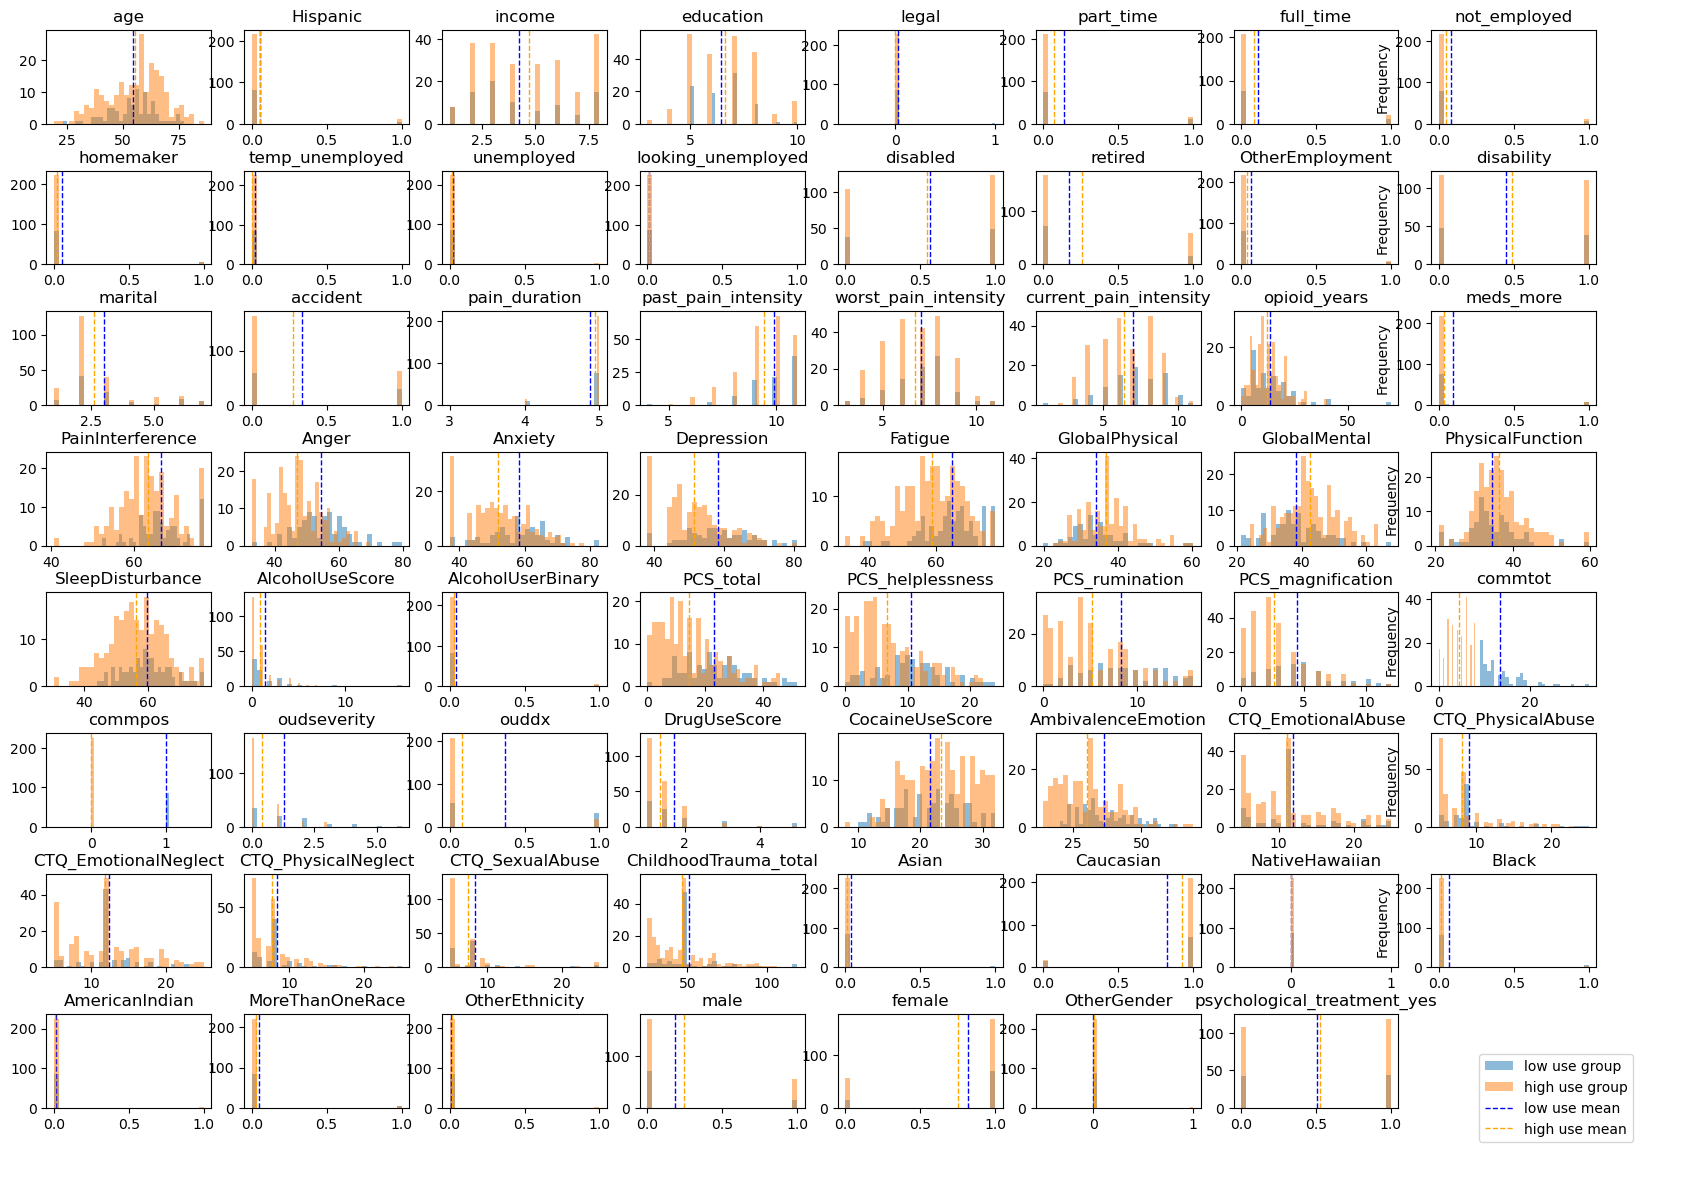

<Figure size 640x480 with 0 Axes>

In [22]:
# Set the number of rows and columns for the subplots
num_rows = 8
num_cols = 8

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 14))

# Flatten the axes array
axes = axes.flatten()

new_df = df.drop(columns=['record_id']).reset_index()
df1 = df.loc[df['commtot'] >= 9].reset_index(drop=True)
df2 = df.loc[df['commtot'] < 9].reset_index(drop=True)

# Plot the histograms for shared columns
for i in range(1, len(df1.columns)):
    column = df1.columns[i]
    ax = axes[i-1]
    ax.hist(df1[column], bins=30, alpha=0.5, label='low use group')
    ax.hist(df2[column], bins=30, alpha=0.5, label='high use group')
    ax.axvline(df1[column].mean(), color='b', linestyle='dashed', linewidth=1, label='low use mean')
    ax.axvline(df2[column].mean(), color='orange', linestyle='dashed', linewidth=1, label='high use mean')
    # ax.set_xlabel(column)
    ax.title.set_text(column)
    if i % num_cols == 0:
        ax.set_ylabel('Frequency')

# Remove axis on empty subplots
for j in range(len(df1.columns)-1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the legend
handles, labels = ax.get_legend_handles_labels()
labels = ['low use group', 'high use group', 'low use mean', 'high use mean']
legend_loc = (0.87, 0.05)
fig.legend(handles, labels, loc=legend_loc, ncol=1)

# Show the plot
plt.show()


# save the plot
plt.savefig(figures_dir + 'stratified_factor_distribution_by_dataset.png')





In [23]:
# get bar plot for t test comparison between high and low use groups

from scipy.stats import ttest_ind




# make box plot for high and low groups
df1 = df.loc[df['commtot'] >= 9].reset_index(drop=True)
df2 = df.loc[df['commtot'] < 9].reset_index(drop=True)

# Set the number of rows and columns for the subplots
num_rows = 8
num_cols = 8
significance_list, p_vals, t_vals = [], [], []
for i in range(1, len(df1.columns)):
    column = df1.columns[i]
    t_stat, p_val = ttest_ind(df1[column], df2[column])
    # print(column, 't-statistic =', t_stat, 'p-value =', p_val)
    t_vals.append(t_stat)
    p_vals.append(p_val)


# calculate p value after multiple comparison correction
from statsmodels.stats.multitest import multipletests
p_vals = np.array(p_vals)
reject, p_vals_corrected, _, alphacBonf = multipletests(p_vals, alpha=0.05, method='fdr_bh')

print(alphacBonf)
for i, p_val in enumerate(p_vals_corrected):
    column = df1.columns[i+1]
    
    # add a mark in the plot
    if p_val < 0.001:
        significance_list.append('***')
        print(f'{column}: significantly different')
        print(f"t={t_vals[i]}, p < {p_val}")
    elif p_val < 0.01:
        significance_list.append('**')
        print(f'{column}: significantly different')
        print(f"t={t_vals[i]}, p < {p_val}")
    elif p_val < 0.05:
        significance_list.append('*')
        print(f'{column}: significantly different')
        print(f"t={t_vals[i]}, p < {p_val}")        
    else:
        significance_list.append('')
        
        


0.0007936507936507937
past_pain_intensity: significantly different
t=2.884959488867139, p < 0.013883925783279176
current_pain_intensity: significantly different
t=2.538074434346316, p < 0.03227482248521981
PainInterference: significantly different
t=3.787778811403984, p < 0.0007179857392041172
Anger: significantly different
t=7.564434605473678, p < 9.24398092836745e-12
Anxiety: significantly different
t=5.40679918725768, p < 7.318562721603165e-07
Depression: significantly different
t=5.950262008880257, p < 5.6595344970320646e-08
Fatigue: significantly different
t=5.239325807937216, p < 1.5604904154023362e-06
GlobalPhysical: significantly different
t=-3.3485849282527287, p < 0.003378976460558994
GlobalMental: significantly different
t=-4.032492958600733, p < 0.0002916328046725733
SleepDisturbance: significantly different
t=3.13307261061535, p < 0.006629274394383549
AlcoholUseScore: significantly different
t=2.503722036337214, p < 0.033599709463328235
PCS_total: significantly different
t

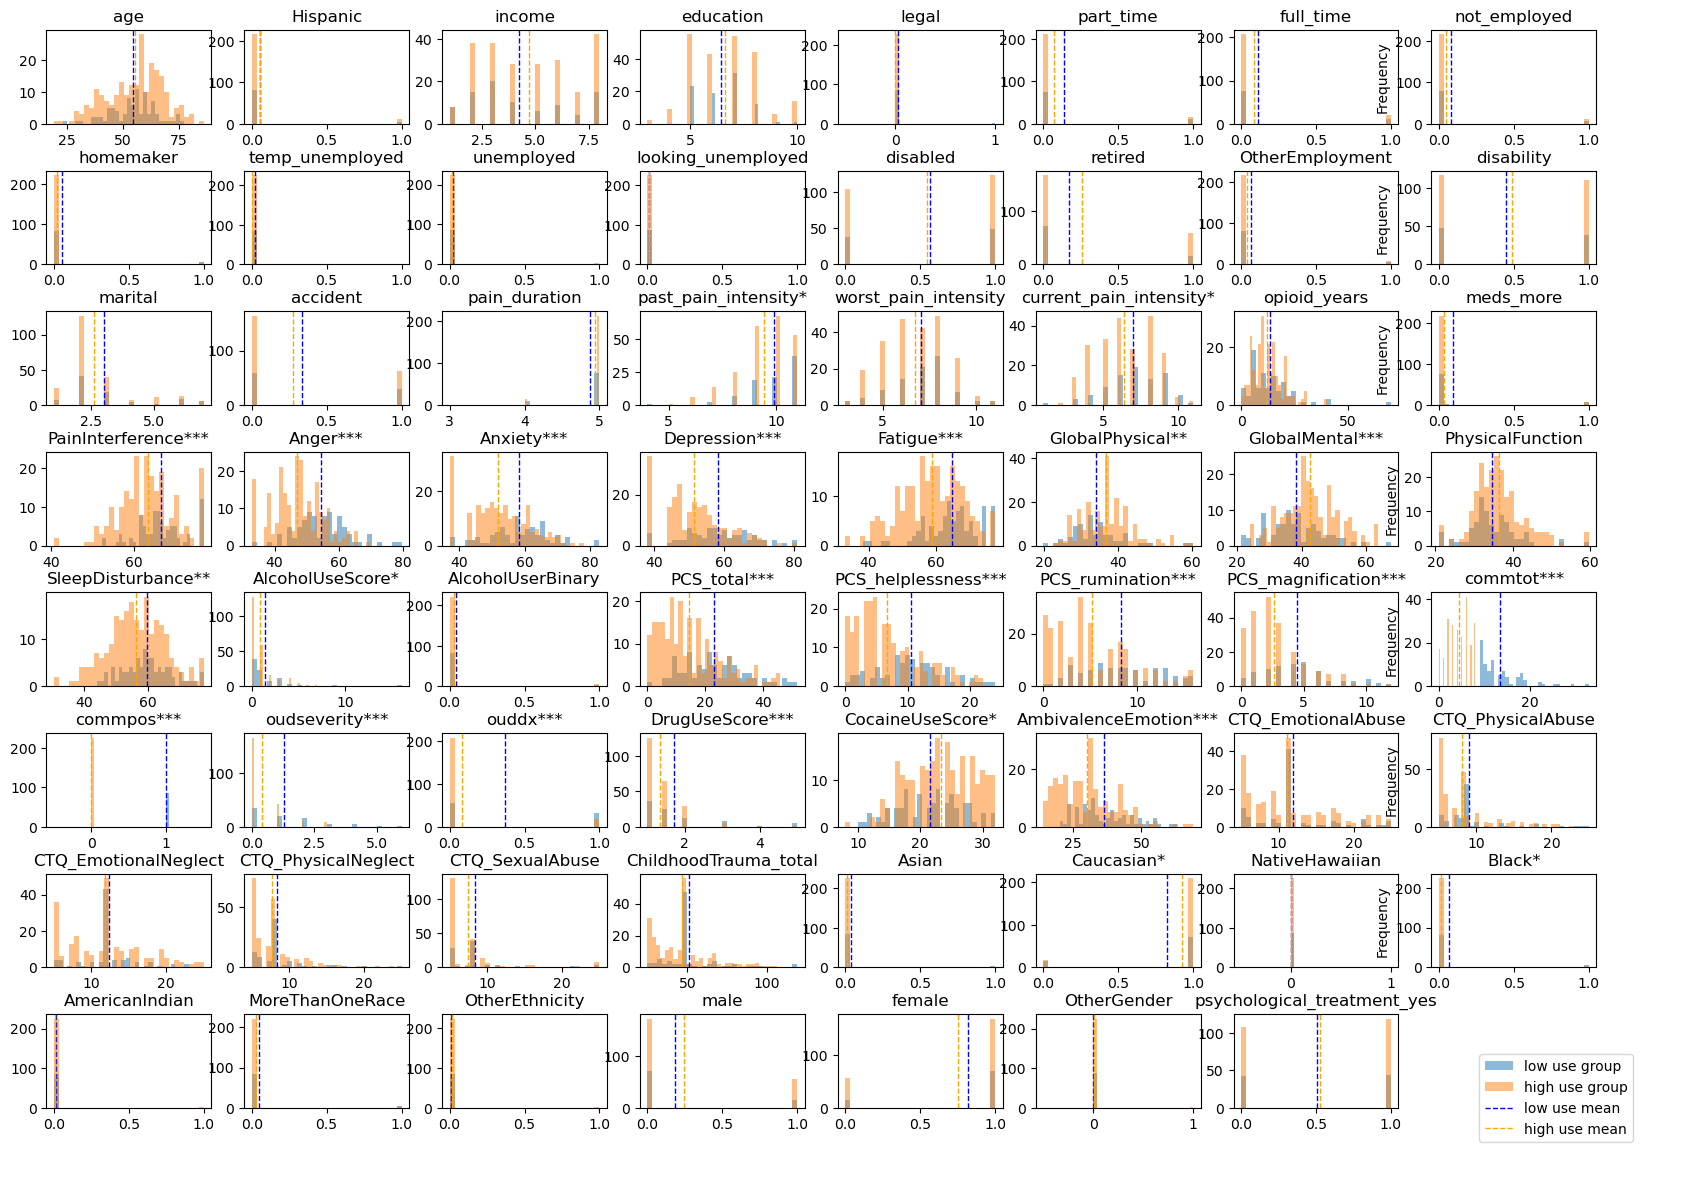

<Figure size 640x480 with 0 Axes>

In [24]:
# Set the number of rows and columns for the subplots
num_rows = 8
num_cols = 8

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 14))

# Flatten the axes array
axes = axes.flatten()

new_df = df.drop(columns=['record_id']).reset_index()
df1 = df.loc[df['commtot'] >= 9].reset_index(drop=True)
df2 = df.loc[df['commtot'] < 9].reset_index(drop=True)


for i in range(1, len(df1.columns)):
    
    column = df1.columns[i]
    ax = axes[i-1]
    ax.hist(df1[column], bins=30, alpha=0.5, label='low use group')
    ax.hist(df2[column], bins=30, alpha=0.5, label='high use group')
    ax.axvline(df1[column].mean(), color='b', linestyle='dashed', linewidth=1, label='low use mean')
    ax.axvline(df2[column].mean(), color='orange', linestyle='dashed', linewidth=1, label='high use mean')
    
    
    ax.title.set_text(column + significance_list[i-1])


    if i % num_cols == 0:
        ax.set_ylabel('Frequency')

# Remove axis on empty subplots
for j in range(len(df1.columns)-1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the legend
handles, labels = ax.get_legend_handles_labels()
labels = ['low use group', 'high use group', 'low use mean', 'high use mean']
legend_loc = (0.87, 0.05)
fig.legend(handles, labels, loc=legend_loc, ncol=1)

# Show the plot
plt.show()


# save the plot
plt.savefig(figures_dir + 'stratified_factor_distribution_by_dataset.png')

    

